# Program Analysis Seedling Kickoff Demo

*University of Arizona*

*July 26, 2018*


In this demo we will show how a dynamic Bayes network (DBN) can be constructed from the source code for a FORTRAN program. This notebook has been tested with the version of Delphi corresponding to the commit hash below.

In [1]:
!git rev-parse HEAD

0d724093684cb878663cf7fd093c1445527d128c


Some preliminaries:

In [2]:
%load_ext autoreload
%autoreload 2
import json
import delphi.program_analysis as pa
from IPython.core.display import Image
import delphi.jupyter_tools as jt

We start with the FORTRAN program, `crop_yield.f` shown below.

In [3]:
jt.display(f'../data/program_analysis/crop_yield.f')

The FORTRAN program is now analyzed by the autoTranslate 
program analysis pipeline:
- Analyze the FORTRAN source
- Translate the FORTRAN source analysis into a functionally equivalent Python source file
- Generate graphical model representation of 

In [4]:
%cd ../delphi/program_analysis/autoTranslate/
!./autoTranslate ../../../data/program_analysis/crop_yield.f
%cd ../../../notebooks/

/Users/claytonm/Documents/repository/ml4ai/delphi/delphi/program_analysis/autoTranslate
+ java fortran.ofp.FrontEnd --class fortran.ofp.XMLPrinter --verbosity 0 ../../../data/program_analysis/crop_yield.f
+ python3.6 scripts/translate.py -f crop_yield.xml -g crop_yield.py
+ python3.6 scripts/genPGM.py -f crop_yield.py -p pgm.json -l lambdas.py
/Users/claytonm/Documents/repository/ml4ai/delphi/notebooks


This generates several files.  First, a functionally equivalent Python source file is generated:

In [5]:
jt.display('../delphi/program_analysis/autoTranslate/crop_yield.py')

The Python source is then parsed into a JSON representation of the 
statements and functions contained in the program. 

In [6]:
dbn_json = '../delphi/program_analysis/autoTranslate/pgm.json'
jt.display(dbn_json)

Delphi takes this JSON description, discovers all scopes and assignment 
statements in it, and builds a graph that shows how 
information flows through the program during runtime.

## Program initialization

We construct a nested scope tree, and display the graph representation from 
the nested scope tree.

## Constructing the scope tree

The scope tree is a rooted collection of nested `Scope` objects.
We currently have two different scopes that our program identifies:

- A `LoopScope` meant to track loops found in the initial program 
- A `FuncScope` meant to track functions found in the initial program.

The `scope_tree` defined below will be a `Scope` object that has other `Scope` obejects as its children.

In [7]:
with open(dbn_json, 'r') as f:
    d = json.load(f)
    
from delphi.program_analysis.scopes import scope_tree_from_json
scope_tree = scope_tree_from_json(d)

## Viewing the DBN


The final step is to construct a DBN from `scope_tree`. Below we create a digraph to show the DBN as a flow of information through the program at runtime. Scopes are nested and the breadth of each scope is shown with a colored bounding box. Function scopes are colored in green while loop scopes are shown in blue. Each scope is labeled with the scope specific name as found in the JSON specification. Variables from the program are shown as ellipses contained in their appropriate scopes. Variables are named with the name of the variable in the program and the name of the scope in which the variable was first defined. Actions, such as variable assignment or conditional evaluation, are shown as red rectangles and are labeled similarly to variables.

This graph has a linked structure that shows how variables from one scope populate for use into child scopes. This allows us to see the entire data flow profile of the initial program at runtime.

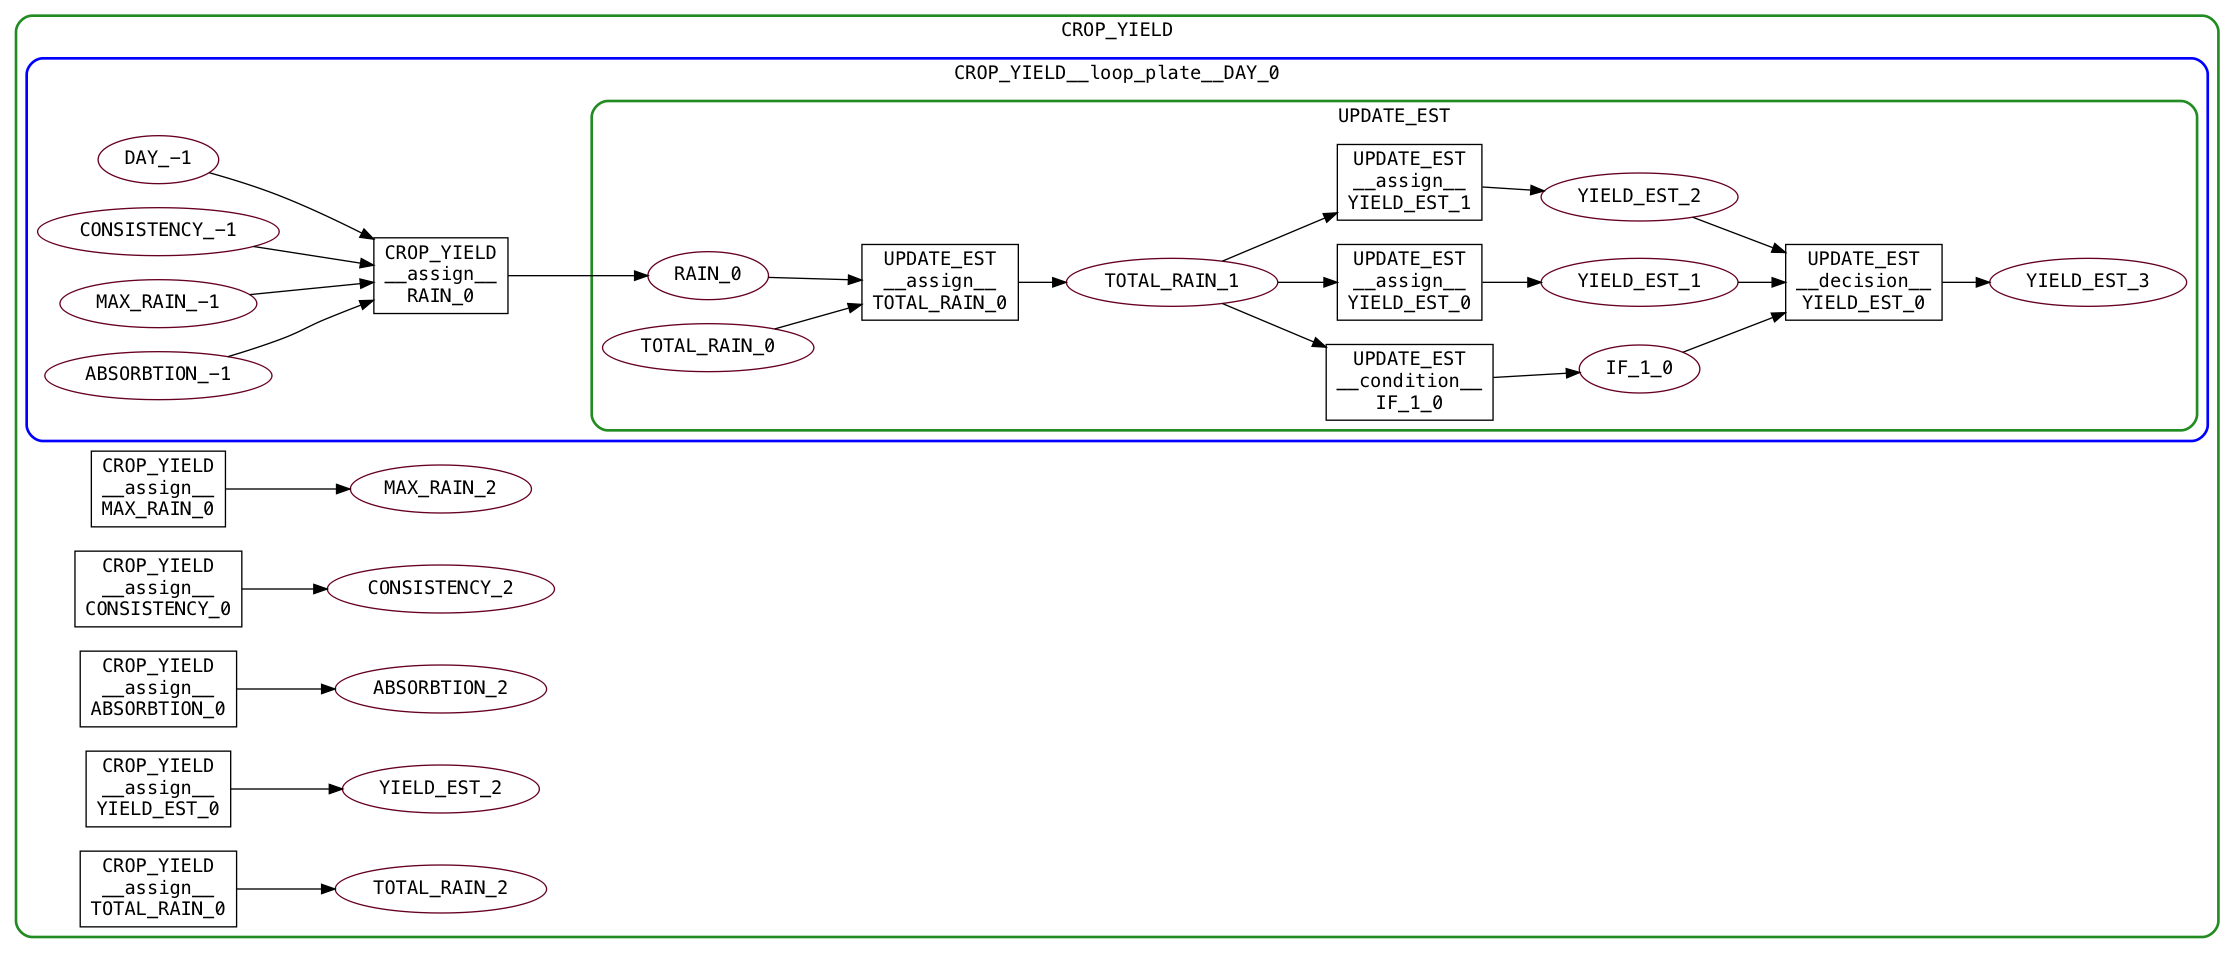

In [8]:
from delphi.program_analysis.parse_dbn_json import setup_directed_graph
graph = setup_directed_graph()
scope_tree.build_containment_graph(graph)
Image(graph.draw(format='png', prog='dot'), retina=True)